In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

Loading Dataset

In [2]:
df = pd.read_csv('women_clothing_ecommerce_sales.csv')
df.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


Exploratory Data Analysis:dividing our EDA into two types:Visual and Numerical.
starting off with the Numerical part:

In [3]:
df.shape

(527, 8)

In [4]:
df.columns

Index(['order_id', 'order_date', 'sku', 'color', 'size', 'unit_price',
       'quantity', 'revenue'],
      dtype='object')

In [5]:
df.describe()

,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


Dealing with types

In [6]:
df.dtypes

order_id       int64
order_date    object
sku           object
color         object
size          object
unit_price     int64
quantity       int64
revenue        int64
dtype: object

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])
df =df.set_index('order_date')

Handle NA values

In [8]:
#checking for columns with there respective numbers of empty raw values
df.isnull().sum()

order_id       0
sku            0
color          0
size          37
unit_price     0
quantity       0
revenue        0
dtype: int64

In [9]:
#drop the na_values raws since they insignificant as compared to our 527 raws
df = df.dropna()
df.isnull().sum()

order_id      0
sku           0
color         0
size          0
unit_price    0
quantity      0
revenue       0
dtype: int64

Drop features that are not required to build our model

In [10]:
df = df.drop(['order_id'],axis='columns')
df.head()

,sku,color,size,unit_price,quantity,revenue
order_date,,,,,,
2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298
2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258
2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228
2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264
2022-06-11 11:42:00,799,Dark Blue,M,264,1,264


checking out columns separately
Also it makes sense to go feature by feature and check which pitfalls we 
have in our data and also to understand our numbers better.

stock keep unit column

In [11]:
df['sku'].value_counts().tail()

sku
1499    2
229     2
539     2
29      1
628     1
Name: count, dtype: int64

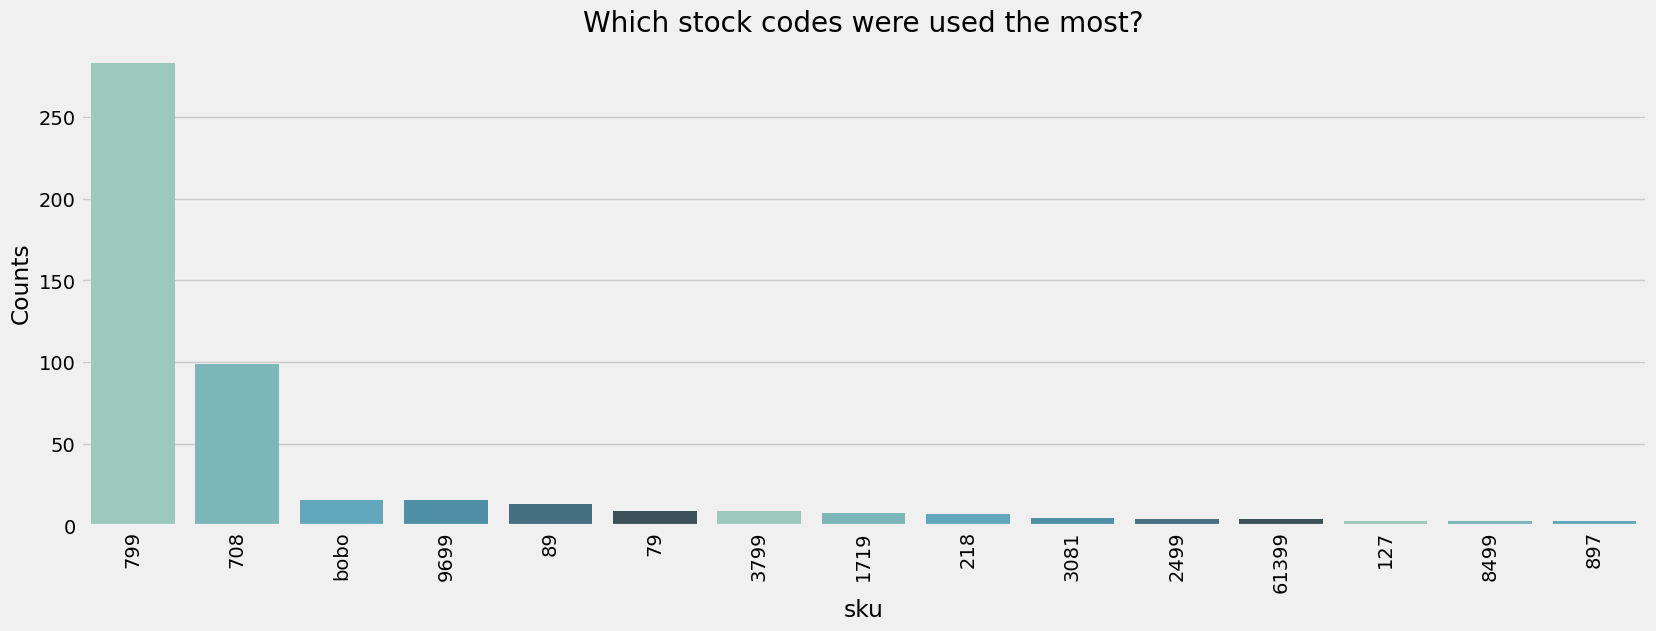

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_counts = df['sku'].value_counts().sort_values(ascending=False).iloc[0:15]

plt.figure(figsize=(18, 6))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?")
plt.xticks(rotation=90);  # Rotate x-axis labels for better readability
plt.show()


Color feature

In [13]:
df['color'].value_counts().tail()

color
Brown              1
Cornflower Blue    1
Pink               1
Red Orange         1
Gray Stripes       1
Name: count, dtype: int64

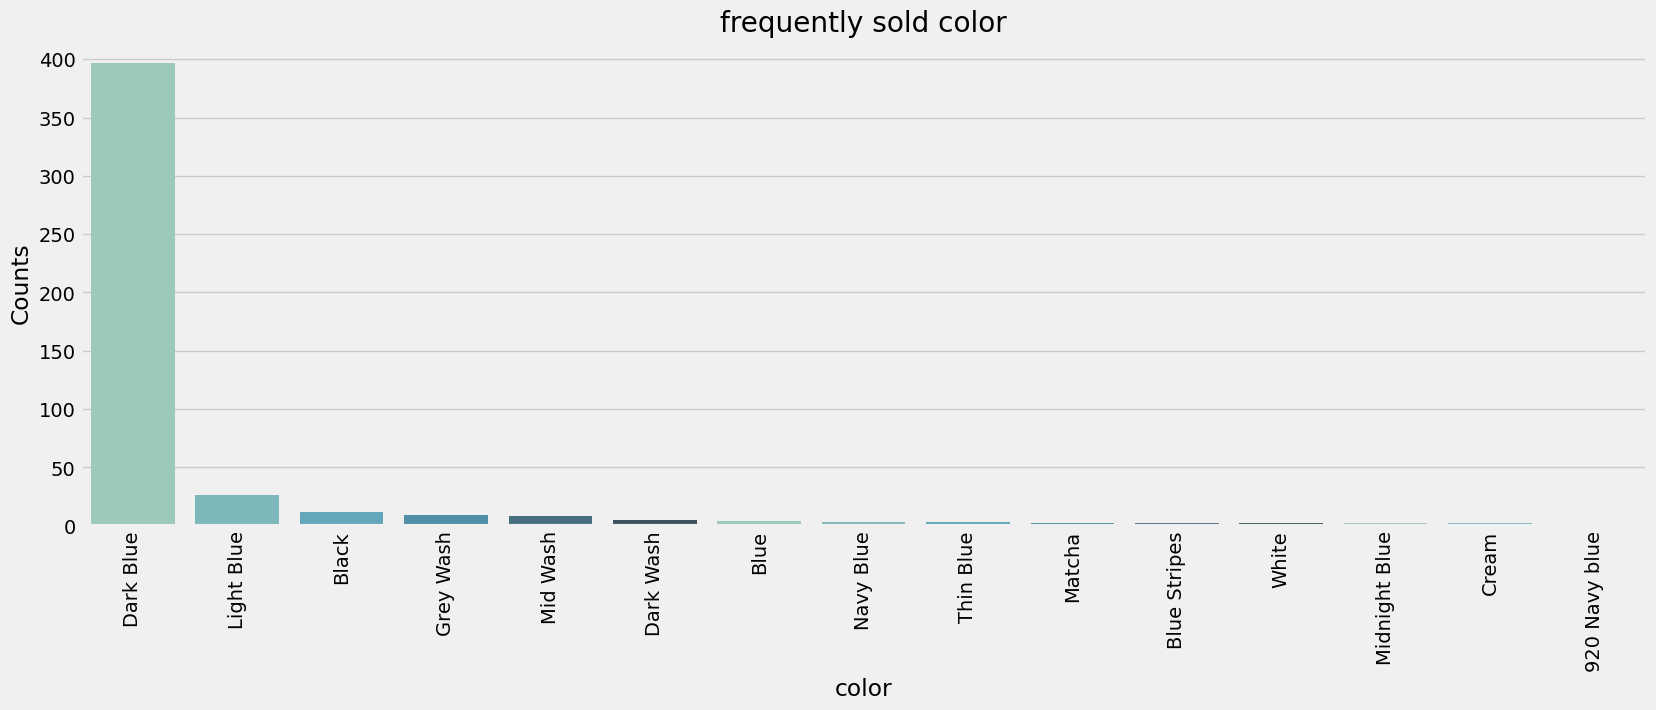

In [14]:

color_count = df['color'].value_counts().sort_values(ascending=False).iloc[0:15]

plt.figure(figsize=(18, 6))
sns.barplot(x=color_count.index, y=color_count.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("frequently sold color")
plt.xticks(rotation=90); # Rotate x-axis labels for better readability
plt.show()

checking out the size feature

In [15]:
df['size'].value_counts().head()

size
XL          164
M            92
L            91
One Size     45
2XL          43
Name: count, dtype: int64

dropping the one Size raw since the raw has been repeated looking for the one with the lowest entries

In [16]:
df['size'].unique()

array(['2XL', 'One Size', 'XL', 'M', '3XL', 'L', '4XL', 'S', 'One SIze'],
      dtype=object)

In [17]:
count = (df == 'One SIze').sum().sum()
print('number of raws containing One SIze',count)

number of raws containing One SIze 5


In [18]:
#drop one size raw from the column size since it's repetitive
df = df[df['size'] != 'One SIze']

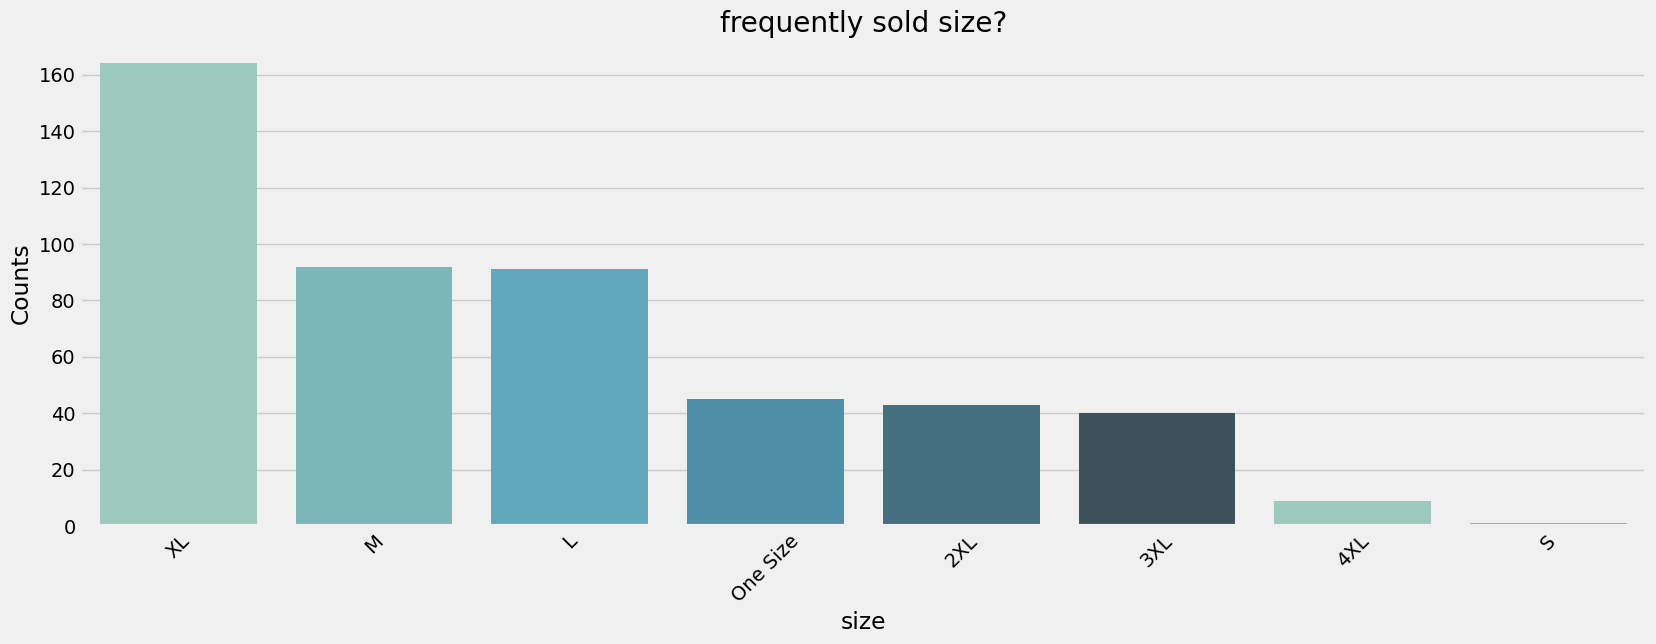

In [19]:
size_counts = df['size'].value_counts().sort_values(ascending=False).iloc[0:15]

plt.figure(figsize=(18, 6))
sns.barplot(x=size_counts.index, y=size_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("frequently sold size?")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Detecting outliers and removing outliers
There are few different methods to detect outliers:std deviation, box plots, using IQR, scatter plot also works in some cases (and this is one of those). Also, detecting outliers using scatter plot is pretty intuitive. You plot your data and remove data points that visually are definitely out of range.

Let's remove obvious outliers

In [20]:
df.revenue.describe()

count    485.000000
mean     280.274227
std       45.337634
min      191.000000
25%      266.000000
50%      278.000000
75%      288.000000
max      899.000000
Name: revenue, dtype: float64

Using standard deviation to removwe outliers

Text(0, 0.5, 'Frequency')

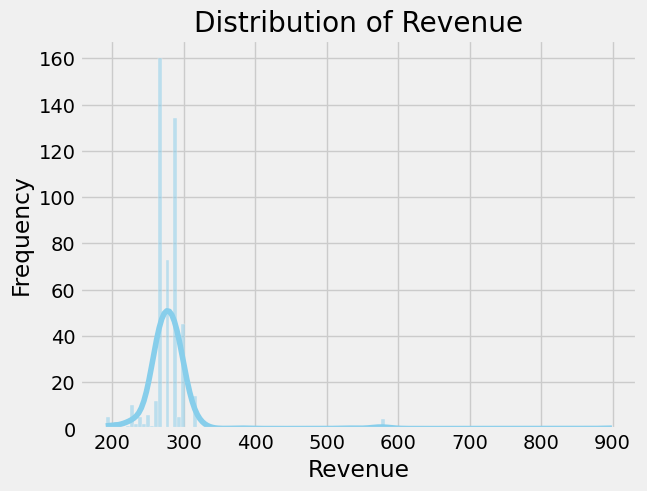

In [21]:
sns.histplot(df['revenue'], kde=True, color='skyblue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

In [22]:
upper_limit = df.revenue.mean() + 3*df.revenue.std()
upper_limit

416.2871299240652

In [23]:
lower_limit = df.revenue.mean() -3*df.revenue.std()
lower_limit

144.2613236841822

In [24]:
df[(df.revenue>upper_limit) | (df.revenue<lower_limit)]

,sku,color,size,unit_price,quantity,revenue
order_date,,,,,,
2022-07-11 17:19:00,799,Dark Blue,M,288,2,576
2022-07-06 17:14:00,9699,Black,One Size,288,2,576
2022-08-25 13:02:00,799,Dark Blue,XL,288,2,576
2022-08-05 19:33:00,708,Dark Blue,4XL,899,1,899
2022-09-10 02:31:00,799,Dark Blue,XL,265,2,530
2022-09-19 10:05:00,799,Dark Blue,L,288,2,576


In [25]:
df1 = df[(df.revenue<upper_limit) & (df.revenue>lower_limit)]
df1.head()

,sku,color,size,unit_price,quantity,revenue
order_date,,,,,,
2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298
2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258
2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228
2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264
2022-06-11 11:42:00,799,Dark Blue,M,264,1,264


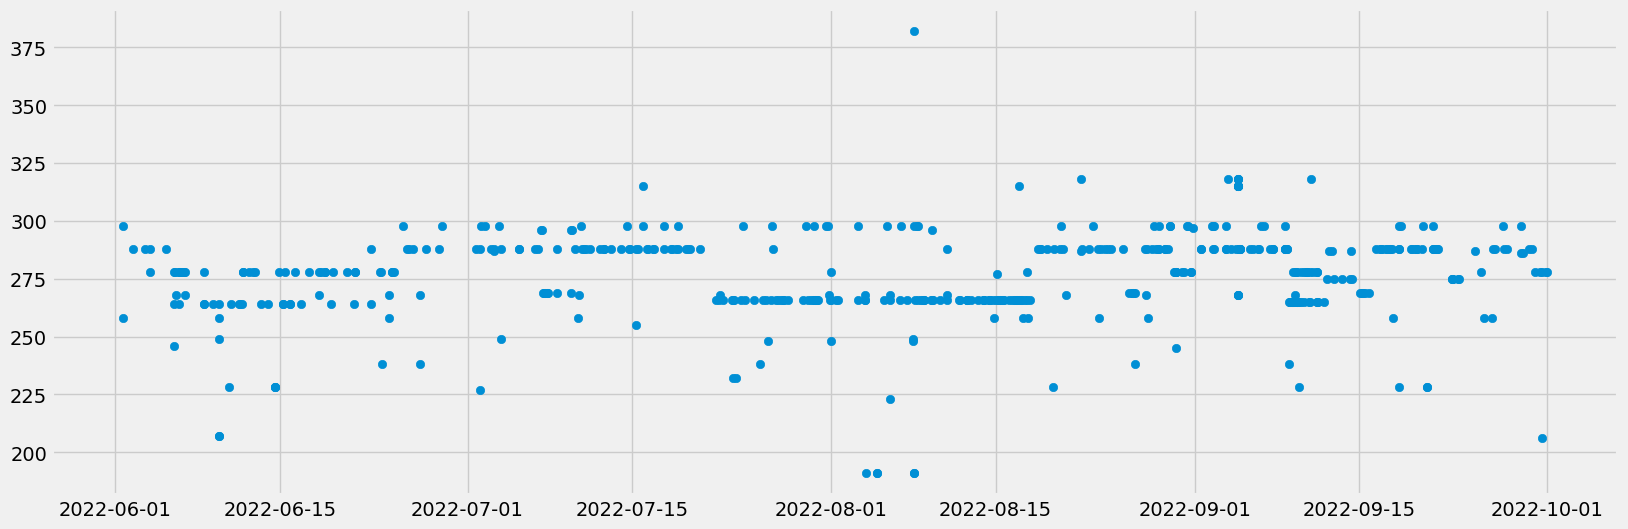

In [26]:
plt.figure(figsize=(18,6))
plt.scatter(x=df1 .index, y=df1 ['revenue'])

(array([19144., 19158., 19174., 19188., 19205., 19219., 19236., 19250.,
        19266.]),
 [Text(19144.0, 0, '2022-06-01'),
  Text(19158.0, 0, '2022-06-15'),
  Text(19174.0, 0, '2022-07-01'),
  Text(19188.0, 0, '2022-07-15'),
  Text(19205.0, 0, '2022-08-01'),
  Text(19219.0, 0, '2022-08-15'),
  Text(19236.0, 0, '2022-09-01'),
  Text(19250.0, 0, '2022-09-15'),
  Text(19266.0, 0, '2022-10-01')])

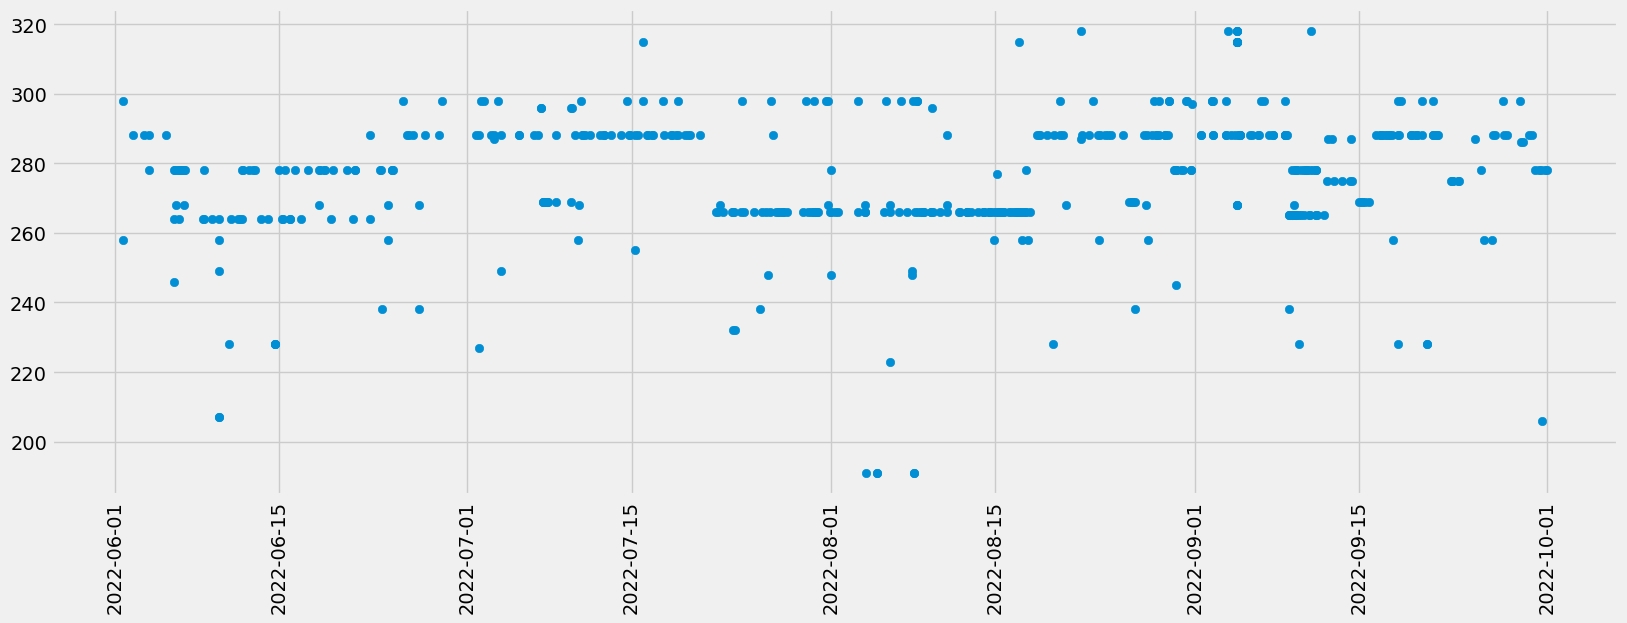

In [27]:
df2= df1[df1['revenue'] < 325]
plt.figure(figsize=(18,6))
plt.scatter(x=df2.index, y=df2['revenue'])
plt.xticks(rotation=90)

After removing obvious outliers we still see some values that are out of normal distribution. To understand better the distribution of our data let's check out different percentiles of our numeric features.

In [28]:
df2[['revenue', 'unit_price', 'quantity']] = df2[['revenue', 'unit_price', 'quantity']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any of the specified columns
df2 = df2.dropna(subset=['revenue', 'unit_price', 'quantity'])

# calculating quantiles again for each column separately
quantiles_revenue = df2['revenue'].quantile([0.05, 0.95, 0.98, 0.99, 0.999])
quantiles_unit_price = df2['unit_price'].quantile([0.05, 0.95, 0.98, 0.99, 0.999])
quantiles_quantity = df2['quantity'].quantile([0.05, 0.95, 0.98, 0.99, 0.999])
print(quantiles_quantity,quantiles_unit_price,quantiles_revenue)

0.050    1.0
0.950    1.0
0.980    1.0
0.990    1.0
0.999    1.0
Name: quantity, dtype: float64 0.050    238.0
0.950    298.0
0.980    315.0
0.990    318.0
0.999    318.0
Name: unit_price, dtype: float64 0.050    238.0
0.950    298.0
0.980    315.0
0.990    318.0
0.999    318.0
Name: revenue, dtype: float64


We can see that if we remove top 2% of our data points we will get rid of absolute outliers and will have more balaced dataset.

(array([19144., 19158., 19174., 19188., 19205., 19219., 19236., 19250.,
        19266.]),
 [Text(19144.0, 0, '2022-06-01'),
  Text(19158.0, 0, '2022-06-15'),
  Text(19174.0, 0, '2022-07-01'),
  Text(19188.0, 0, '2022-07-15'),
  Text(19205.0, 0, '2022-08-01'),
  Text(19219.0, 0, '2022-08-15'),
  Text(19236.0, 0, '2022-09-01'),
  Text(19250.0, 0, '2022-09-15'),
  Text(19266.0, 0, '2022-10-01')])

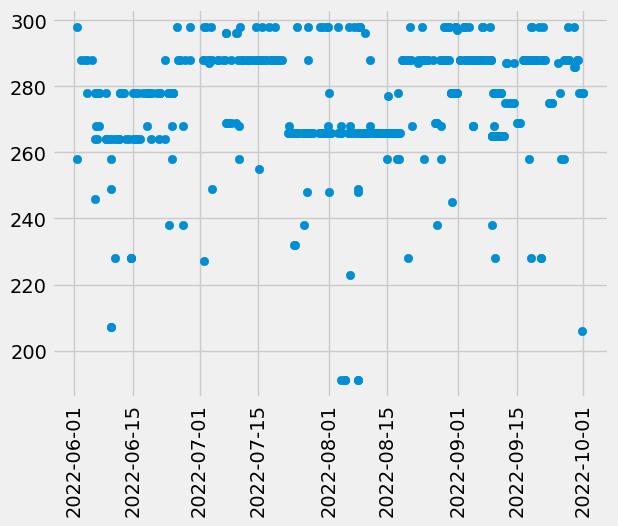

In [29]:
#use the 98th percentile revenue value
df3 = df2[df2['revenue'] < 315 ]
plt.scatter(x=df3.index, y=df3['revenue'])
plt.xticks(rotation=90)

In [30]:
df3.describe()

,unit_price,quantity,revenue
count,464.000000,464.0,464.000000
mean,274.547414,1.0,274.547414
std,18.362263,0.0,18.362263
min,191.000000,1.0,191.000000
25%,266.000000,1.0,266.000000
50%,278.000000,1.0,278.000000
75%,288.000000,1.0,288.000000
max,298.000000,1.0,298.000000


our data is almost ready for modelling.We are done with clean up,we removed outliers and invalid data records

Visual representation of distribution of numeric features

unit price

<Axes: ylabel='Count'>

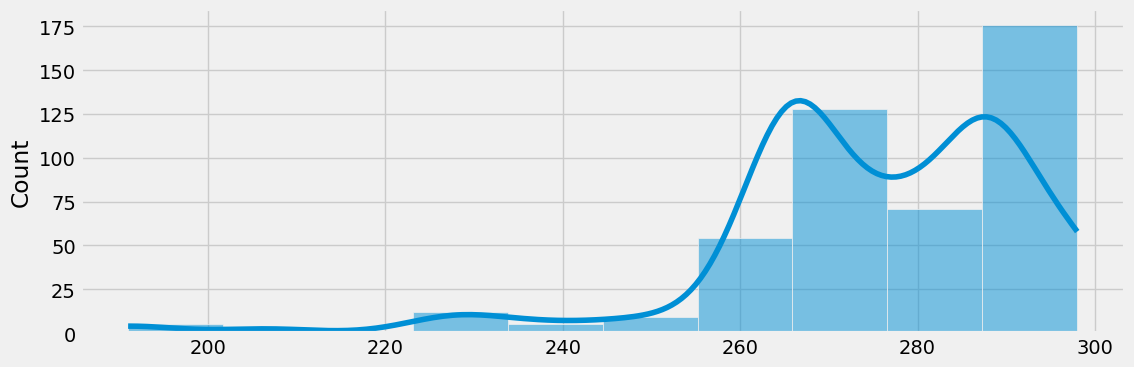

In [31]:
plt.figure(figsize=(12,4))
sns.histplot(df3[df3['unit_price'] < 315]['unit_price'].values, kde=True, bins=10)

majority of clothes that were bought were the ones with the price tag below 270

quantity

<Axes: xlabel='quantity', ylabel='Count'>

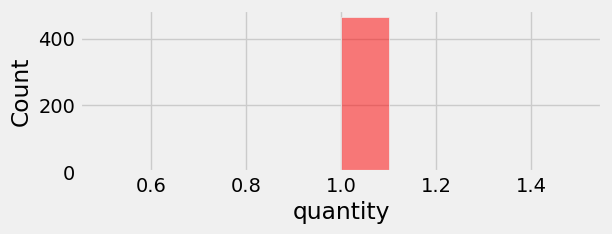

In [32]:
plt.figure(figsize=(6,2))
sns.histplot(df3[df3['quantity'] <= 2]['quantity'], kde=True, bins=10, color='red')

from the above histogram majority clothes were bought in quantity of 1

revenue

<Axes: xlabel='revenue', ylabel='Count'>

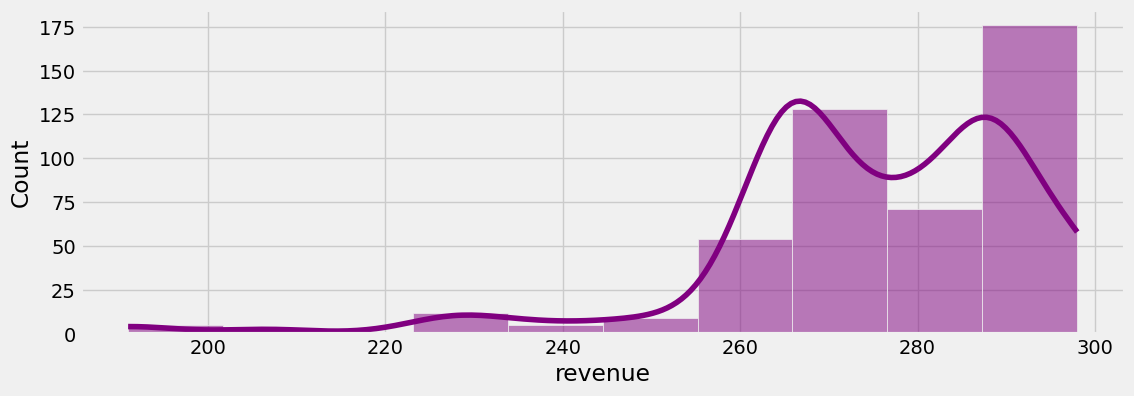

In [33]:
plt.figure(figsize=(12,4))
sns.histplot(df3[df3['revenue'] < 318]['revenue'], kde=True, bins=10, color='purple')

From these histograms we can understand that majority of revenue generated per order were in range of 180 to 270

analysing revenue 

In [34]:
df_ts = df3[['revenue']]
df_ts.head(10)

,revenue
order_date,
2022-06-01 16:05:00,298
2022-06-01 16:05:00,258
2022-06-10 17:03:00,228
2022-06-10 19:59:00,264
2022-06-11 11:42:00,264
2022-06-11 14:46:00,264
2022-06-11 19:23:00,264
2022-06-11 19:54:00,278
2022-06-11 21:09:00,278


As we can see every order_date has it's own timestamp (definitely based on time the order was made). We can resample time data by, for example weeks, and try see if there is any patterns in our revenue data

<Axes: xlabel='order_date'>

<Figure size 2000x600 with 0 Axes>

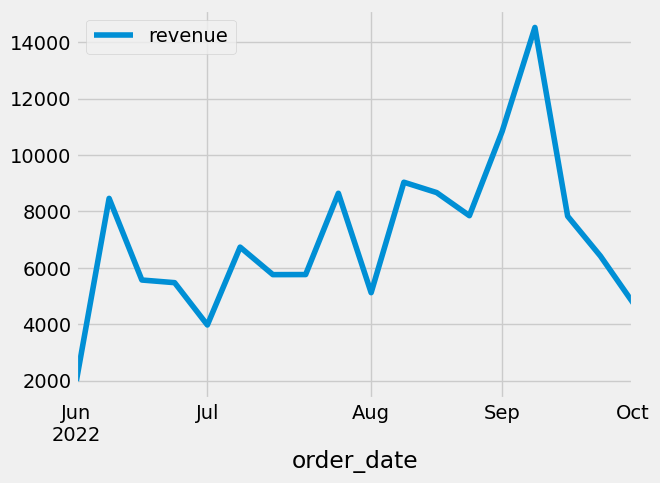

In [35]:
plt.figure(figsize=(20,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

There are no anomalies in our revenue data from our weekly sales

In [36]:
df_resample['8-2022':'9-2022']

,revenue
order_date,
2022-08-07,5117
2022-08-14,9036
2022-08-21,8669
2022-08-28,7849
2022-09-04,10840
2022-09-11,14528
2022-09-18,7831
2022-09-25,6418


Preparing data for modeling and feature creation

In [37]:
df_clean = df[df['unit_price'] < 320 ]
df_clean.describe()

,unit_price,quantity,revenue
count,484.000000,484.000000,484.000000
mean,275.673554,1.012397,278.995868
std,19.713918,0.110763,35.574259
min,191.000000,1.000000,191.000000
25%,266.000000,1.000000,266.000000
50%,278.000000,1.000000,278.000000
75%,288.000000,1.000000,288.000000
max,318.000000,2.000000,576.000000


In [38]:
df_clean.index

DatetimeIndex(['2022-06-01 16:05:00', '2022-06-01 16:05:00',
               '2022-06-10 17:03:00', '2022-06-10 19:59:00',
               '2022-06-11 11:42:00', '2022-06-11 14:46:00',
               '2022-06-11 19:23:00', '2022-06-11 19:54:00',
               '2022-06-11 21:09:00', '2022-06-12 17:32:00',
               ...
               '2022-09-09 21:17:00', '2022-09-09 23:59:00',
               '2022-09-09 03:29:00', '2022-09-09 05:55:00',
               '2022-09-09 06:10:00', '2022-09-09 06:27:00',
               '2022-09-09 07:18:00', '2022-09-09 07:22:00',
               '2022-09-09 08:25:00', '2022-09-09 09:47:00'],
              dtype='datetime64[ns]', name='order_date', length=484, freq=None)

In [39]:
#resetting index
df_clean= df_clean.reset_index()
df_clean.head()

,order_date,sku,color,size,unit_price,quantity,revenue
0,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298
1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258
2,2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228
3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264
4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264


In [40]:
df_clean.columns 

Index(['order_date', 'sku', 'color', 'size', 'unit_price', 'quantity',
       'revenue'],
      dtype='object')

Bucketizing Quantity and UnitPrice features


Based on the EDA done previously we can group these features into 2 buckets for Quantity and 7 for UnitePrice using pandas .cut() method.
[(0, 100), (100, 200), (200, 300), (300, 400)]

In [41]:
bins_q = pd.IntervalIndex.from_tuples([(0, 1), (1, 2)])
df_clean['QuantityRange'] = pd.cut(df_clean['quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 50), (50, 100), (100, 150), (150, 200), (200, 250), (250, 300), (300, 350)])
df_clean['PriceRange'] = pd.cut(df_clean['unit_price'], bins=bins_p)
df_clean.head()

,order_date,sku,color,size,unit_price,quantity,revenue,QuantityRange,PriceRange
0,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298,"(0, 1]","(250, 300]"
1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258,"(0, 1]","(250, 300]"
2,2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228,"(0, 1]","(200, 250]"
3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264,"(0, 1]","(250, 300]"
4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264,"(0, 1]","(250, 300]"


Extracting and bucketizing dates

In [42]:
df_clean['Month'] = df_clean['order_date'].dt.month
df_clean.head()

,order_date,sku,color,size,unit_price,quantity,revenue,QuantityRange,PriceRange,Month
0,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298,"(0, 1]","(250, 300]",6
1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258,"(0, 1]","(250, 300]",6
2,2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228,"(0, 1]","(200, 250]",6
3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264,"(0, 1]","(250, 300]",6
4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264,"(0, 1]","(250, 300]",6


In [43]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_clean['DateRange'] = pd.cut(df_clean['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df_clean.tail()

,order_date,sku,color,size,unit_price,quantity,revenue,QuantityRange,PriceRange,Month,DateRange
479,2022-09-09 06:27:00,799,Dark Blue,M,265,1,265,"(0, 1]","(250, 300]",9,"(6, 9]"
480,2022-09-09 07:18:00,708,Dark Blue,4XL,278,1,278,"(0, 1]","(250, 300]",9,"(6, 9]"
481,2022-09-09 07:22:00,799,Dark Blue,M,265,1,265,"(0, 1]","(250, 300]",9,"(6, 9]"
482,2022-09-09 08:25:00,799,Dark Blue,L,265,1,265,"(0, 1]","(250, 300]",9,"(6, 9]"
483,2022-09-09 09:47:00,799,Dark Blue,XL,265,1,265,"(0, 1]","(250, 300]",9,"(6, 9]"


In [44]:
#droping 
df_clean2=df_clean.drop(['sku','order_date','unit_price'],axis='columns')
df_clean2.head()

,color,size,quantity,revenue,QuantityRange,PriceRange,Month,DateRange
0,Dark Blue,2XL,1,298,"(0, 1]","(250, 300]",6,"(3, 6]"
1,Dark Blue,2XL,1,258,"(0, 1]","(250, 300]",6,"(3, 6]"
2,Cream,One Size,1,228,"(0, 1]","(200, 250]",6,"(3, 6]"
3,Dark Blue,XL,1,264,"(0, 1]","(250, 300]",6,"(3, 6]"
4,Dark Blue,M,1,264,"(0, 1]","(250, 300]",6,"(3, 6]"


Building a model

In [45]:
df_clean3 = df_clean2[['revenue','QuantityRange','PriceRange','DateRange','size','color']]
df_clean3.head()

,revenue,QuantityRange,PriceRange,DateRange,size,color
0,298,"(0, 1]","(250, 300]","(3, 6]",2XL,Dark Blue
1,258,"(0, 1]","(250, 300]","(3, 6]",2XL,Dark Blue
2,228,"(0, 1]","(200, 250]","(3, 6]",One Size,Cream
3,264,"(0, 1]","(250, 300]","(3, 6]",XL,Dark Blue
4,264,"(0, 1]","(250, 300]","(3, 6]",M,Dark Blue


In [46]:
df_data = df_clean3.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data = df_data.replace({False:0,True:1})
df_data.head()

,revenue,size,color,"qr_(0, 1]","qr_(1, 2]","pr_(0, 50]","pr_(50, 100]","pr_(100, 150]","pr_(150, 200]","pr_(200, 250]","pr_(250, 300]","pr_(300, 350]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,298,2XL,Dark Blue,1,0,0,0,0,0,0,1,0,0,1,0,0
1,258,2XL,Dark Blue,1,0,0,0,0,0,0,1,0,0,1,0,0
2,228,One Size,Cream,1,0,0,0,0,0,1,0,0,0,1,0,0
3,264,XL,Dark Blue,1,0,0,0,0,0,0,1,0,0,1,0,0
4,264,M,Dark Blue,1,0,0,0,0,0,0,1,0,0,1,0,0


one hot encoding for color and size feature

In [61]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(df_data[['size']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
features = pd.DataFrame(feature_arry,columns = feature_labels)
df_data1=pd.concat([df_data,features], axis=1)
df_data1.head()

,revenue,size,color,"qr_(0, 1]","qr_(1, 2]","pr_(0, 50]","pr_(50, 100]","pr_(100, 150]","pr_(150, 200]","pr_(200, 250]",...,"dr_(6, 9]","dr_(9, 12]",2XL,3XL,4XL,L,M,One Size,S,XL
0,298,2XL,Dark Blue,1,0,0,0,0,0,0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,258,2XL,Dark Blue,1,0,0,0,0,0,0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,228,One Size,Cream,1,0,0,0,0,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,264,XL,Dark Blue,1,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,264,M,Dark Blue,1,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(df_data[['color']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
features2=pd.DataFrame(feature_arry,columns = feature_labels)
df_data2=pd.concat([df_data1,features2], axis=1)
df_data2.head()

,revenue,size,color,"qr_(0, 1]","qr_(1, 2]","pr_(0, 50]","pr_(50, 100]","pr_(100, 150]","pr_(150, 200]","pr_(200, 250]",...,Light Wash,Maroon,Matcha,Mid Wash,Navy Blue,Pink,Red Orange,Thin Black,Thin Blue,White
0,298,2XL,Dark Blue,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,258,2XL,Dark Blue,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,228,One Size,Cream,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,264,XL,Dark Blue,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,264,M,Dark Blue,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
final = df_data2.drop(["size","color"],axis='columns')
final.head()

,revenue,"qr_(0, 1]","qr_(1, 2]","pr_(0, 50]","pr_(50, 100]","pr_(100, 150]","pr_(150, 200]","pr_(200, 250]","pr_(250, 300]","pr_(300, 350]",...,Light Wash,Maroon,Matcha,Mid Wash,Navy Blue,Pink,Red Orange,Thin Black,Thin Blue,White
0,298,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,258,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,228,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,264,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,264,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
final.columns

Index(['revenue', 'qr_(0, 1]', 'qr_(1, 2]', 'pr_(0, 50]', 'pr_(50, 100]',
       'pr_(100, 150]', 'pr_(150, 200]', 'pr_(200, 250]', 'pr_(250, 300]',
       'pr_(300, 350]', 'dr_(0, 3]', 'dr_(3, 6]', 'dr_(6, 9]', 'dr_(9, 12]',
       '2XL', '3XL', '4XL', 'L', 'M', 'One Size', 'S', 'XL', '920 Navy blue',
       '922 Army green', '922 Black', 'Black', 'Black Stripes', 'Blue',
       'Blue Stripes', 'Cream', 'Dark Blue', 'Dark Wash', 'Gray Stripes',
       'Grey Wash', 'Light Blue', 'Light Gray', 'Light Wash', 'Maroon',
       'Matcha', 'Mid Wash', 'Navy Blue', 'Pink', 'Red Orange', 'Thin Black',
       'Thin Blue', 'White'],
      dtype='object')

Train-Test split
Now we have to split our data into train-test data to be able to train our model and validate its capabilities.

In [68]:
y = final['revenue']
X = final.drop(columns=['revenue'])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

on our linear regression model we are getting negative values we can do dimensionality reduction on the color feature

In [70]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-8.42267437712453e+22

Testing and validating different models
Here we use GridSearch and CrossValidation to test three types of regressors: Linear, DecisionTree and RandomForest. This can take a while...;

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-2.33043396e+21, -2.81790935e+23, -5.81594543e+24, -3.35606465e+23,
       -2.43298491e+23])

We can see that in 5 iterations we get a score above 60% all the time. This isn't pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
         
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

base on the above scores our model seems to be having all the algorithms have the same score maybe work on datapreprocessing,feature engineering or even do ensemble methods 

In [ ]:
print(X.columns)

Index(['qr_(0, 1]', 'qr_(1, 2]', 'pr_(0, 50]', 'pr_(50, 100]', 'pr_(100, 150]',
       'pr_(150, 200]', 'pr_(200, 250]', 'pr_(250, 300]', 'pr_(300, 350]',
       'dr_(0, 3]', 'dr_(3, 6]', 'dr_(6, 9]', 'dr_(9, 12]', 'size_2XL',
       'size_3XL', 'size_4XL', 'size_L', 'size_M', 'size_One Size', 'size_S',
       'size_XL', 'color_920 Navy blue', 'color_922 Army green',
       'color_922 Black', 'color_Black', 'color_Black Stripes', 'color_Blue',
       'color_Blue Stripes', 'color_Cream', 'color_Dark Blue',
       'color_Dark Wash', 'color_Gray Stripes', 'color_Grey Wash',
       'color_Light Blue', 'color_Light Gray', 'color_Light Wash',
       'color_Maroon', 'color_Matcha', 'color_Mid Wash', 'color_Navy Blue',
       'color_Pink', 'color_Red Orange', 'color_Thin Black', 'color_Thin Blue',
       'color_White'],
      dtype='object')


exporting model to pickle file

# Save the model to a pickle file

In [ ]:
import pickle 
with open('sales_predictions.pkl','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
with open('sales_predictions.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction
'''sample_data = [[1, 200, '8:2022']]  # Example input features for prediction
predicted_class = loaded_model.predict(sample_data)
print("Predicted class:", predicted_class)'''

'sample_data = [[1, 200, \'8:2022\']]  # Example input features for prediction\npredicted_class = loaded_model.predict(sample_data)\nprint("Predicted class:", predicted_class)'

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))